In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# 그래프 수치에 마이너스가 나올경우 인코딩 오류 방지
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

-   컬럼 데이터 개수(고추데이터 1000개, 마늘 3000개 등등)
-   요일별 채소 평균가격
-   평균 가격대 분포 히스토그램 (x :가격대(10,000~20,000), y : 개수)
-   (기후데이터) EDA
    - 기후 데이터끼리 상관분석
    - 평균가격과 각 기후데이터 산점도 그래프
    - 반입량과 각 기후데이터 산점도 그래프
-   반입량과 평균가격 산점도 그래프 (x : 평균가격, y : 반입량)
-   반입량과 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 반입량, 평균가격 월 평균)
-   유가와 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 유가, 평균가격 월 평균)

In [6]:
#1. 데이터 로드 및 확인
# onion_best_df = pd.read_csv('./mc_finalPro_data/양파_특.csv')
# onion_best_df.head(3)

xls = pd.ExcelFile('./mc_finalPro_data/양파_특.xlsx')
onion_best_df = xls.parse(xls.sheet_names[0])

xls = pd.ExcelFile('./mc_finalPro_data/양파_상.xlsx')
onion_good_df = xls.parse(xls.sheet_names[0])

In [7]:
onion_best_df.head()

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격
0,2013-01-03,709000,1528,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,1927.557647
1,2013-01-04,549000,1472,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,1928.578235
2,2013-01-05,553000,1474,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,1928.207647
3,2013-01-07,624000,1466,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,1927.256471
4,2013-01-08,579000,1516,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,1928.202353


In [70]:
# data.info()
onion_best_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2366 entries, 0 to 2365
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   일자           2366 non-null   datetime64[ns]
 1   반입량          2366 non-null   int64         
 2   평균가격         2366 non-null   int64         
 3   최저기온(°C)     2366 non-null   float64       
 4   최고기온(°C)     2366 non-null   float64       
 5   일강수량(mm)     2366 non-null   float64       
 6   평균 풍속(m/s)   2366 non-null   float64       
 7   평균 상대습도(%)   2366 non-null   float64       
 8   합계 일조시간(hr)  2366 non-null   float64       
 9   평균 지면온도(°C)  2366 non-null   float64       
 10  유가 전국평균가격    2366 non-null   float64       
 11  일교차          2366 non-null   float64       
 12  요일           2366 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 240.4+ KB


In [14]:
# 결측값 확인
onion_best_df.isna().sum()

일자             0
반입량            0
평균가격           0
최저기온(°C)       0
최고기온(°C)       0
일강수량(mm)       0
평균 풍속(m/s)     0
평균 상대습도(%)     0
합계 일조시간(hr)    0
평균 지면온도(°C)    0
유가 전국평균가격      0
dtype: int64

In [57]:
# 일교차 컬럼 추가
onion_best_df['일교차'] = onion_best_df['최고기온(°C)'] - onion_best_df['최저기온(°C)']
onion_best_df.head()

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,일교차,요일
0,2013-01-03,709000,1528,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,1927.557647,5.1,Thu
1,2013-01-04,549000,1472,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,1928.578235,6.9,Fri
2,2013-01-05,553000,1474,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,1928.207647,9.5,Sat
3,2013-01-07,624000,1466,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,1927.256471,7.6,Mon
4,2013-01-08,579000,1516,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,1928.202353,11.5,Tue


In [58]:
# 요일별 채소 평균가격
onion_best_df['요일']=onion_best_df['일자'].map(lambda x:x.strftime('%a'))
onion_best_df.head()

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,일교차,요일
0,2013-01-03,709000,1528,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,1927.557647,5.1,Thu
1,2013-01-04,549000,1472,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,1928.578235,6.9,Fri
2,2013-01-05,553000,1474,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,1928.207647,9.5,Sat
3,2013-01-07,624000,1466,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,1927.256471,7.6,Mon
4,2013-01-08,579000,1516,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,1928.202353,11.5,Tue


In [66]:
onion_best_df_day = onion_best_df.groupby(['요일']).mean()
onion_best_df_day['평균가격']

요일
Fri    1093.493671
Mon    1106.136364
Sat    1102.142487
Thu    1103.254408
Tue    1109.824121
Wed    1110.365482
Name: 평균가격, dtype: float64

Text(0.5, 1.0, '양파(특) 요일별채소 평균가격')

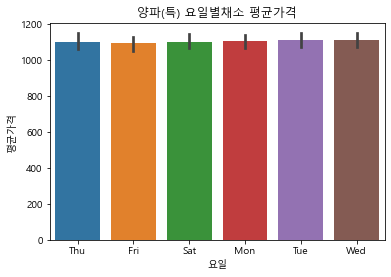

In [61]:
sns.barplot(x='요일', y='평균가격', data=onion_best_df)
plt.title('양파(특) 요일별채소 평균가격')

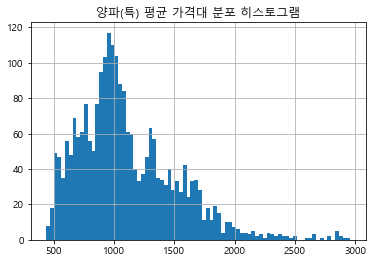

In [62]:
# 평균 가격대 분포 히스토그램 (x :가격대(10,000~20,000), y : 개수)
plt.title('양파(특) 평균 가격대 분포 히스토그램')
plt.hist(onion_best_df['평균가격'], bins=80)
plt.grid()
plt.show()

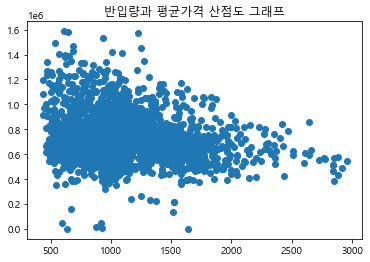

In [63]:
# 반입량과 평균가격 산점도 그래프 (x : 평균가격, y : 반입량)
plt.scatter(onion_best_df['평균가격'], onion_best_df['반입량'])
plt.title('반입량과 평균가격 산점도 그래프')
plt.show()

In [128]:
# 반입량과 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 반입량, 평균가격 월 평균)
onion_best_df['년월']=onion_best_df['일자'].map(lambda x:x.strftime('%Y%m'))
onion_best_df.head()

onion_best_df_yearmonth = onion_best_df.groupby(['년월']).mean()
test01 = onion_best_df_yearmonth['평균가격']
test02 = onion_best_df_yearmonth['반입량']
test04 = onion_best_df_yearmonth[['평균가격','반입량']]

In [100]:
test01.head()

년월
201301    1577.480000
201302    1920.285714
201303    2184.807692
201304    2518.730769
201305    1786.692308
Name: 평균가격, dtype: float64

In [96]:
test02.head()

년월
201301    509120.000000
201302    564428.571429
201303    516961.538462
201304    631653.846154
201305    750730.769231
Name: 반입량, dtype: float64

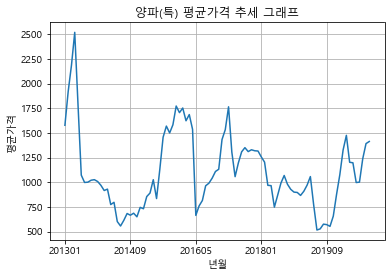

In [102]:
test01.plot()
plt.grid()
plt.xlabel('년월')
plt.ylabel('평균가격')
plt.title('양파(특) 평균가격 추세 그래프')
plt.show()

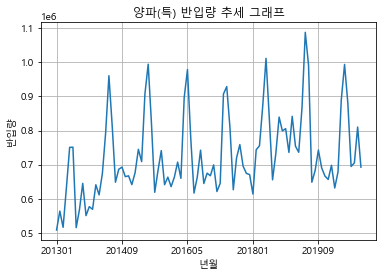

In [105]:
test02.plot()
plt.grid()
plt.xlabel('년월')
plt.ylabel('반입량')
plt.title('양파(특) 반입량 추세 그래프')
plt.show()

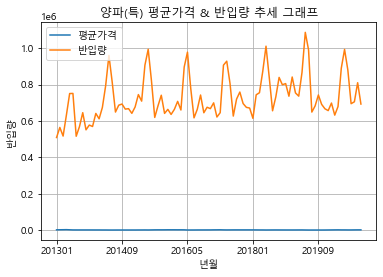

In [129]:
test04.plot()
plt.grid()
plt.xlabel('년월')
plt.ylabel('반입량')
plt.title('양파(특) 평균가격 & 반입량 추세 그래프')
plt.show()
##평균가격과 반입량의 숫자 차이가 너무 커서 잘 안보임..

In [126]:
# 유가와 평균가격 추세 그래프 (x : 2013.1~2020.12, y : 유가, 평균가격 월 평균)
test03 = onion_best_df_yearmonth['유가 전국평균가격']
test03.head()

년월
201301    1924.544353
201302    1957.228739
201303    1987.242919
201304    1949.282376
201305    1901.308688
Name: 유가 전국평균가격, dtype: float64

In [121]:
# test03 = test03.reset_index(drop=False)
# test03

,년월,유가 전국평균가격
0,201301,1924.544353
1,201302,1957.228739
2,201303,1987.242919
3,201304,1949.282376
4,201305,1901.308688
...,...,...
89,202006,1324.930682
90,202007,1359.805316
91,202008,1360.628918
92,202009,1353.980376


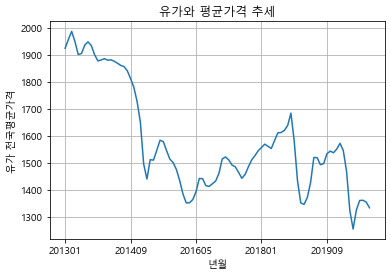

In [127]:
test03.plot()
plt.grid()
plt.xlabel('년월')
plt.ylabel('유가 전국평균가격')
plt.title('유가와 평균가격 추세')
plt.show()

In [138]:
onion_best_df.head()

,일자,반입량,평균가격,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,일교차,요일,년월
0,2013-01-03,709000,1528,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,1927.557647,5.1,Thu,201301
1,2013-01-04,549000,1472,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,1928.578235,6.9,Fri,201301
2,2013-01-05,553000,1474,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,1928.207647,9.5,Sat,201301
3,2013-01-07,624000,1466,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,1927.256471,7.6,Mon,201301
4,2013-01-08,579000,1516,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,1928.202353,11.5,Tue,201301


In [143]:
test06 = onion_best_df.iloc[:, 3:12]
test06.head()

,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),유가 전국평균가격,일교차
0,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,1927.557647,5.1
1,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,1928.578235,6.9
2,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,1928.207647,9.5
3,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,1927.256471,7.6
4,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,1928.202353,11.5


In [146]:
temp_df = test06.drop(['유가 전국평균가격'], axis=1)
temp_df.head()

,최저기온(°C),최고기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일조시간(hr),평균 지면온도(°C),일교차
0,-7.0,-1.9,0.0,2.6,61.9,5.4,-0.5,5.1
1,-7.0,-0.1,0.0,2.8,54.3,9.3,-0.7,6.9
2,-6.8,2.7,0.0,1.8,60.0,8.4,-0.4,9.5
3,-4.5,3.1,0.0,2.3,50.0,7.6,0.2,7.6
4,-6.3,5.2,0.0,2.3,56.5,9.0,0.2,11.5


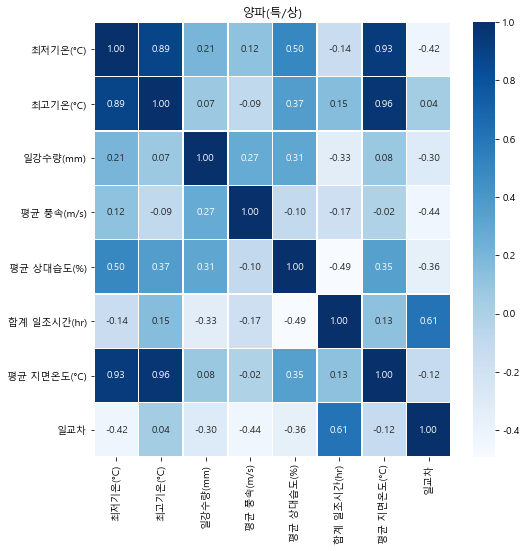

In [155]:
plt.figure(figsize=(8,8))
sns.heatmap(data = temp_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('양파(특/상)')
plt.show()

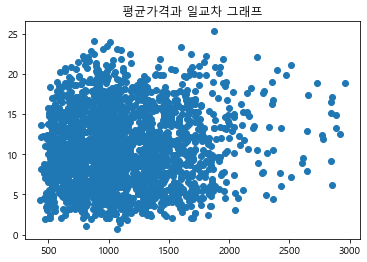

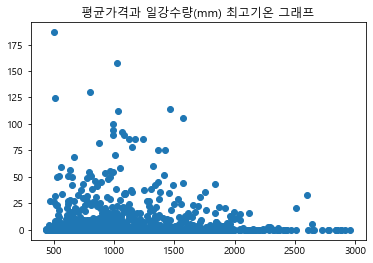

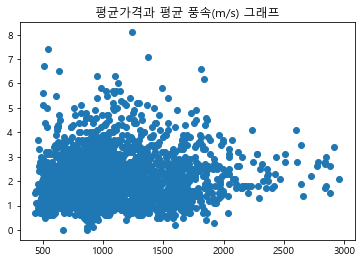

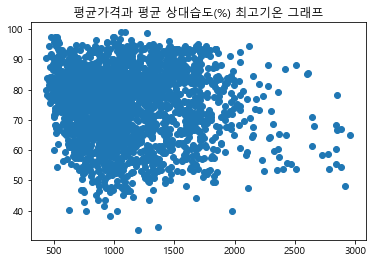

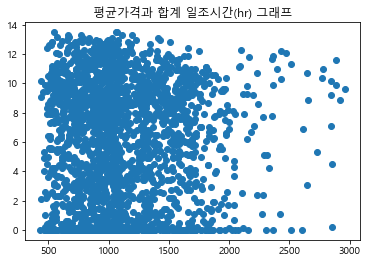

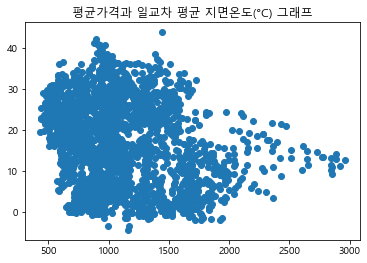

In [153]:
# 평균가격과 각 기후데이터 산점도 그래프
plt.scatter(onion_best_df['평균가격'], onion_best_df['일교차'])
plt.title('평균가격과 일교차 그래프')
plt.show()

plt.scatter(onion_best_df['평균가격'], onion_best_df['일강수량(mm)'])
plt.title('평균가격과 일강수량(mm) 최고기온 그래프')
plt.show()

plt.scatter(onion_best_df['평균가격'], onion_best_df['평균 풍속(m/s)'])
plt.title('평균가격과 평균 풍속(m/s) 그래프')
plt.show()

plt.scatter(onion_best_df['평균가격'], onion_best_df['평균 상대습도(%)'])
plt.title('평균가격과 평균 상대습도(%) 최고기온 그래프')
plt.show()

plt.scatter(onion_best_df['평균가격'], onion_best_df['합계 일조시간(hr)'])
plt.title('평균가격과 합계 일조시간(hr) 그래프')
plt.show()

plt.scatter(onion_best_df['평균가격'], onion_best_df['평균 지면온도(°C)'])
plt.title('평균가격과 일교차 평균 지면온도(°C) 그래프')
plt.show()



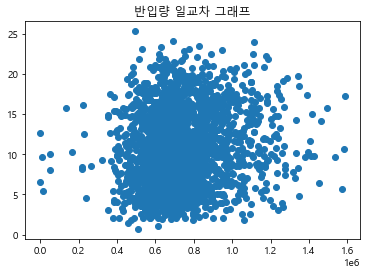

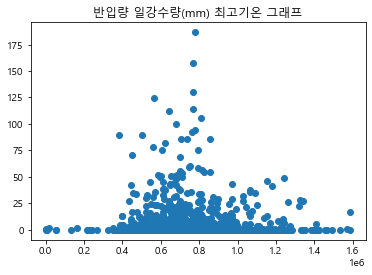

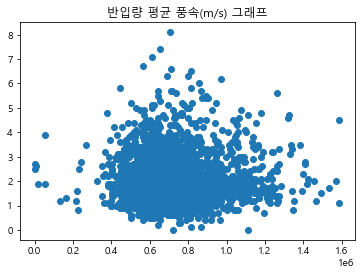

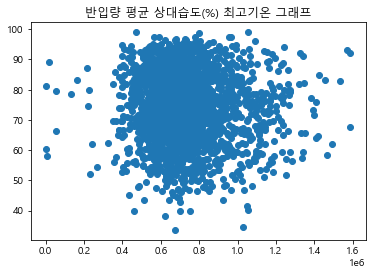

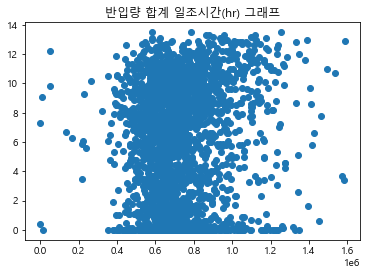

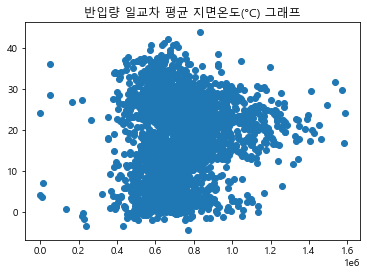

In [154]:
# 반입량과 각 기후데이터 산점도 그래프
plt.scatter(onion_best_df['반입량'], onion_best_df['일교차'])
plt.title('반입량 일교차 그래프')
plt.show()

plt.scatter(onion_best_df['반입량'], onion_best_df['일강수량(mm)'])
plt.title('반입량 일강수량(mm) 최고기온 그래프')
plt.show()

plt.scatter(onion_best_df['반입량'], onion_best_df['평균 풍속(m/s)'])
plt.title('반입량 평균 풍속(m/s) 그래프')
plt.show()

plt.scatter(onion_best_df['반입량'], onion_best_df['평균 상대습도(%)'])
plt.title('반입량 평균 상대습도(%) 최고기온 그래프')
plt.show()

plt.scatter(onion_best_df['반입량'], onion_best_df['합계 일조시간(hr)'])
plt.title('반입량 합계 일조시간(hr) 그래프')
plt.show()

plt.scatter(onion_best_df['반입량'], onion_best_df['평균 지면온도(°C)'])
plt.title('반입량 일교차 평균 지면온도(°C) 그래프')
plt.show()
